<a href="https://colab.research.google.com/github/leehj2586/leehj/blob/main/ESAA_0930_%ED%8C%8C%EB%A8%B8%EC%99%848%EC%9E%A5_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파머완 2판 p. 534-538, 550-565

## 6. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
- 토픽모델링: 문서 집합에 숨어있는 주제를 찾아내는 것
    - 사람 수행 : 더 함축적 의미로 문장 요약
    - 머신러닝 기반: 숨겨진 주제를 효과적으로 표현 가능한 중심 단어를 함축적으로 추출
- 기법: LSA(Latent Semantic Analysis), LDA(Latent Dirichlet Allocation)

- LDA 토픽모델링을 위해 필요한 주제만 필터링 / 추출 → Count 기반 벡터화 변환

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출, fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers', 'quotes'),
                             categories = cats, random_state = 0)

# LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = 'english', ngram_range = (1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- 토픽 모델링: 토픽 개수-8개)

In [4]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [5]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [7]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names,15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


## 7. 문서 유사도
### 문서 유사도 측정 방법 - 코사인 유사도
- 코사인 유사도: 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다 벡터의 상호 방향성이 얼마나 유사한지에 기반

### 두 벡터 사잇각
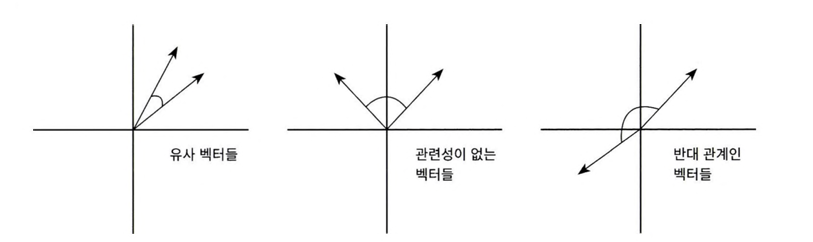

### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [8]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))))* np.sqrt(sum(np.square(v2)))
    similarity = dot_product / l2_norm

    return similarity

- 3개의 문서의 유사도 비교를 위한 TF-IDF로 벡터화된 행렬로 변환

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


- 희소행렬 → 밀집행렬 → 배열 : doc_list의 첫번째 두번재 문서의 유사도 측정

In [12]:
# TFidVectorizer로 transform()한 결과는 희소행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도: 0.402


- 첫번째 문장과 세번째 문장, 두번째 문장과 세번째 문장의 유사도 측정

In [13]:
vect1= np.array(feature_vect_dense[0]).reshape(-1,)
vect3= np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2= np.array(feature_vect_dense[1]).reshape(-1,)
vect3= np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장1, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장3 Cosine 유사도: 0.404
문장1, 문장3 Cosine 유사도: 0.456


- 첫번째 문서와 비교해 첫번째 문서, 두번째, 세번째 문서의 유사도 측정

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- 자기 자신과의 유사도 측정 제외

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


- 모든 개별 문서에 쌍으로 코사인 유사도 값 계산

In [17]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [26]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환.
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [41]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r"/content/drive/MyDrive/ESAA/OB/OpinosisDataset1.0/topics"
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text' : opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words='english',
                            ngram_range = (1,2), min_df=0.05, max_df = 0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

문서를 피처 벡터화해 변환 → 문서 내 단어에 출현빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화됨 → 피처화된 데이터를 상호비교해 유사도 확인 (cosisne_similarity())

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 2 인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도#####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([ 0,  2,  4,  6, 14, 16, 17, 19, 22, 24, 25, 30, 36, 37, 38, 39, 45, 46,
       47, 48, 49, 50],
      dtype='int64')
##### 비교 기준 문서명  /content/drive/MyDrive/ESAA/OB/OpinosisDataset1 와 타 문서 유사도#####
[[1.         0.87235155 0.79742523 0.03505144 0.02911322 0.02589076
  0.01265576 0.12157277 0.0303119  0.01672391 0.03546642 0.31211549
  0.0115454  0.01452646 0.2100003  0.24196947 0.21032724 0.02670592
  0.04025051 0.22766637 0.17227799 0.01821977]]


- 첫번째 문서와 다른 문서간 유사도가 높은 순으로 정렬 후, 시각화

가장 유사도가 큰 파일명 및 유사도:
 filename      /content/drive/MyDrive/ESAA/OB/OpinosisDataset1
similarity                                           0.872352
Name: 2, dtype: object


Text(0.5, 1.0, '/content/drive/MyDrive/ESAA/OB/OpinosisDataset1')

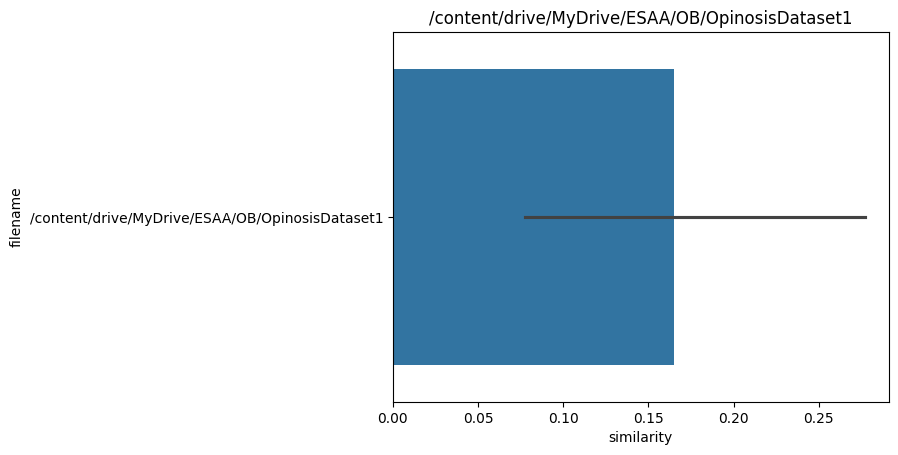

In [49]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

In [51]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [52]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [53]:
import re

train_df = train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

#테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/ratings_test.txt', sep='\t', encoding='utf-8')
test_df['document'] = test_df['document'].astype(str).apply(lambda x: re.sub(r"\d+", " ", x))

#id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [55]:
# KoNLPY 설치 하기

!pip install konlpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 23.4 MB/s eta 0:00:00


In [56]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
#입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [58]:
#로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

#파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = { 'C' : [1, 3.5, 4.5, 5.5, 10] }
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [59]:
from sklearn.metrics import accuracy_score

#학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

#classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)
print ('Logistic Regression 정확도:', accuracy_score(test_df ['label'], preds))

Logistic Regression 정확도: 0.86172
